In [81]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

In [90]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 


bin_img = copy.deepcopy(image_gray)
border  = 90 
bin_img[image_gray < border] = 0
bin_img[image_gray >= border] = 255

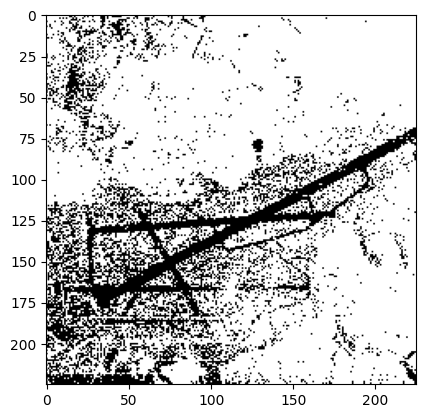

In [91]:
plt.imshow(bin_img, cmap="gray")

In [92]:
canny = cv2.Canny(bin_img,0,250,apertureSize = 3)


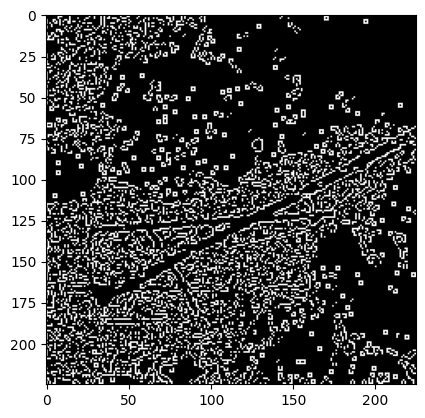

In [93]:
plt.imshow(canny, cmap="gray")

In [94]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

In [95]:
line_image=image.copy()

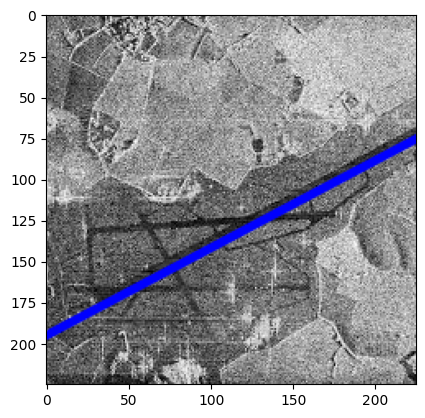

In [96]:
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(line_image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.imshow(line_image)
plt.show()

In [98]:
def show(image1, title1, image2, title2):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(image1, cmap='gray')
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(image2, cmap='gray')
    plt.title(title2)
    plt.show()


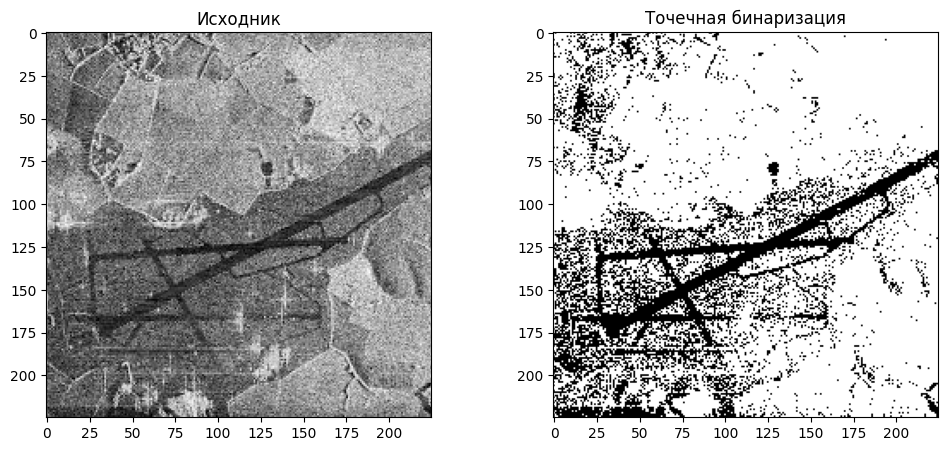

In [ ]:
show(image, 'Оригинал', bin_img, 'Точечная бинаризация')

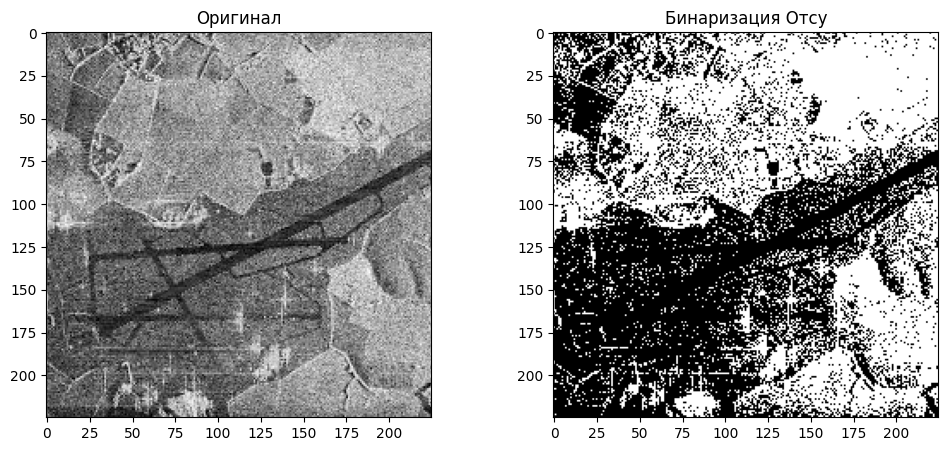

In [103]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

show(image, 'Оригинал', th2, 'Бинаризация Отсу')

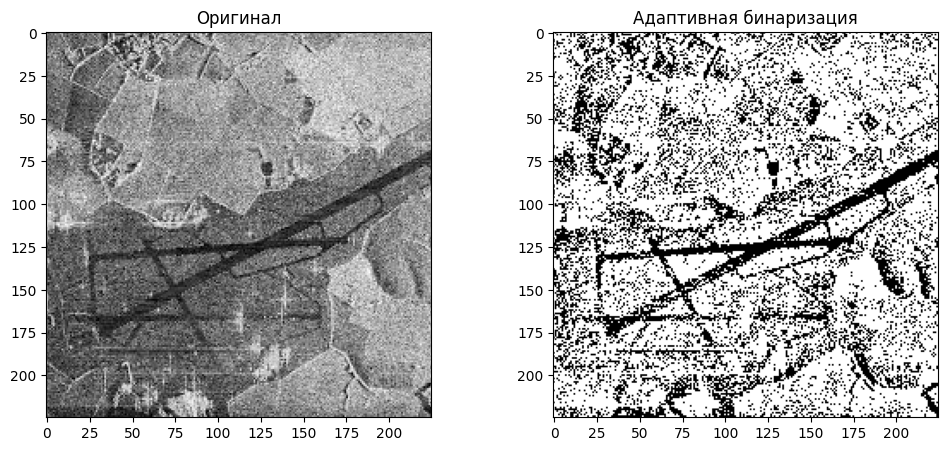

In [105]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)

show(image, 'Оригинал', th3, 'Адаптивная бинаризация')

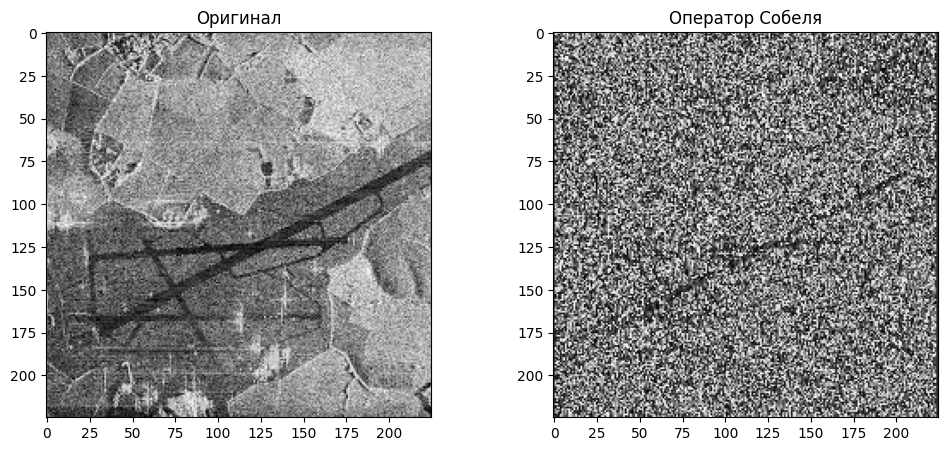

In [106]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
th3=(grad_x - grad_x.min())*255
show(image, 'Оригинал', th3, 'Оператор Собеля')

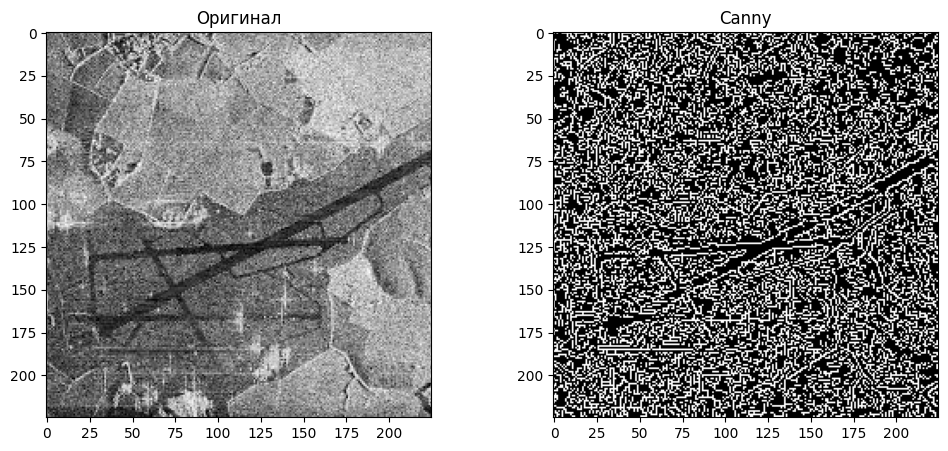

In [107]:
edges = cv2.Canny(image_gray,100,200)
show(image, 'Оригинал', edges, 'Canny')